# Diabetes Prediction for K Nearest Neighbors

# Import  library 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Import Dataset 

In [41]:
data = pd.read_csv("diabetes_prediction_dataset.csv")

In [42]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [43]:
# Describe the datset

In [44]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [46]:
# Check the Null values in dataset

In [47]:
data.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [48]:
data.isnull().any().sum()

0

In [49]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [50]:
data.duplicated().sum()

3854

In [51]:
data.shape

(100000, 9)

In [52]:
# Here we have 3854 duplicate values 

In [53]:
# we can drop the duplicate values

In [54]:
data1 = data.drop_duplicates()

In [55]:
data1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [56]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [57]:
# We can see that other as gender
# Re-check if it was deleted properly

In [58]:
# Remove Unneccessary value 
data1 = data1[data1['gender'] != 'Other']

In [59]:
data1['gender'].unique()

array(['Female', 'Male'], dtype=object)

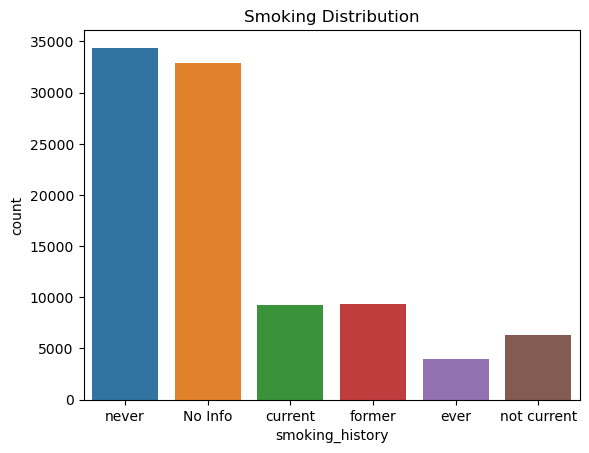

In [60]:
sns.countplot(x='smoking_history', data=data1)
plt.title('Smoking Distribution')
plt.show()

In [61]:
data1['gender'] = data1['gender'].map({"Female": 2, "Male": 1})

In [62]:
# For EDA Analysis we change male to 1 and Female 2

In [63]:
data1['smoking_history'].replace({'never': 2, 'No Info': 3, 'current': 4, 'former': 5,'not current': 6, 'ever': 7}, inplace=True)

In [64]:
# Applying data analysis to a data set.

In [65]:
data1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80.0,0,1,2,25.19,6.6,140,0
1,2,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,2,27.32,5.7,158,0
3,2,36.0,0,0,4,23.45,5.0,155,0
4,1,76.0,1,1,4,20.14,4.8,155,0


In [66]:
data1['diabetes'].value_counts()

0    87646
1     8482
Name: diabetes, dtype: int64

In [ ]:
# There are People suffering with Diabetes : 8484 
# No Diabetes People : 87646

In [67]:
correlation = data1.corr()
correlation['diabetes'].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.424366
HbA1c_level            0.406446
age                    0.264918
bmi                    0.214951
hypertension           0.195696
heart_disease          0.170701
smoking_history        0.057830
gender                -0.037837
Name: diabetes, dtype: float64

In [68]:
data1.drop("gender",axis=1)
data1.drop("smoking_history",axis=1)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,80.0,0,1,25.19,6.6,140,0
1,2,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,2,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99994,2,36.0,0,0,24.60,4.8,145,0
99996,2,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,0
99998,2,24.0,0,0,35.42,4.0,100,0


In [69]:
# gender col is excluded from the column because it is difficult to see a correlation with diabetes.

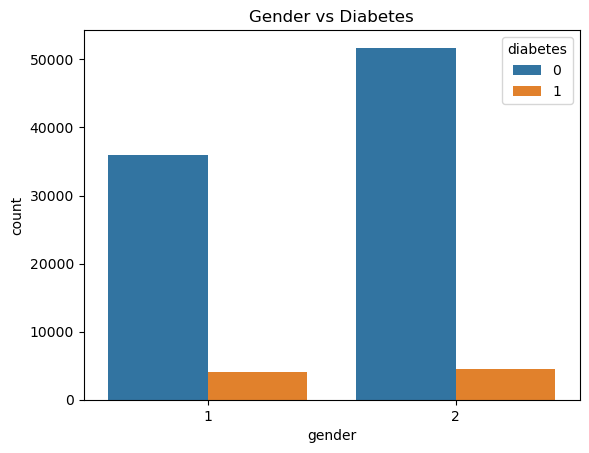

In [71]:
sns.countplot(x='gender', hue='diabetes', data=data1)
plt.title('Gender vs Diabetes')
plt.show()

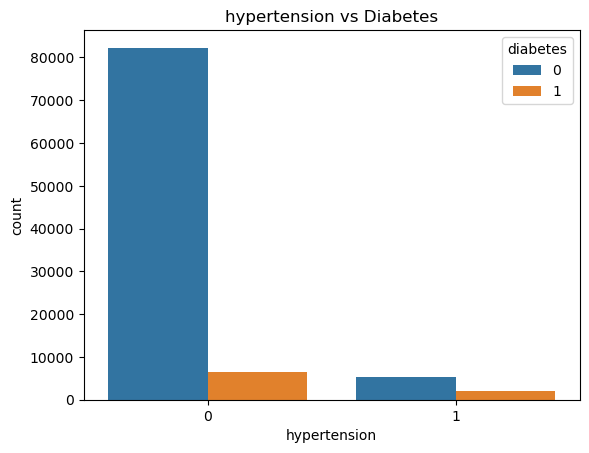

In [72]:
sns.countplot(x='hypertension', hue='diabetes', data=data1)
plt.title('hypertension vs Diabetes')
plt.show()

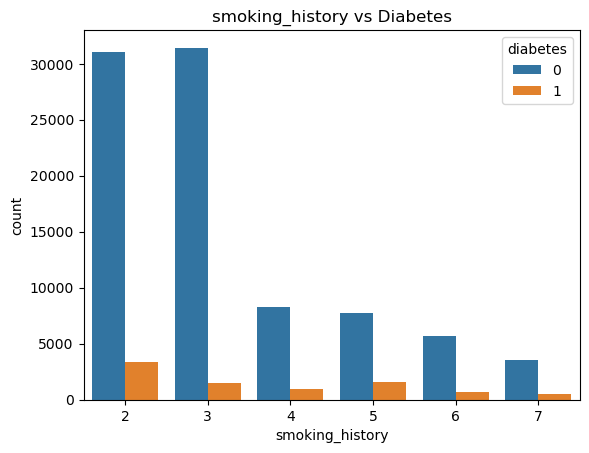

In [73]:
sns.countplot(x='smoking_history', hue='diabetes', data=data1)
plt.title('smoking_history vs Diabetes')
plt.show()

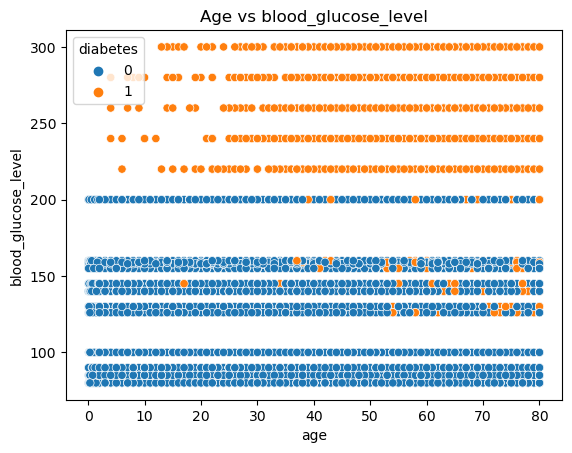

In [74]:
sns.scatterplot(x='age', y='blood_glucose_level', hue='diabetes', data=data1)
plt.title('Age vs blood_glucose_level')
plt.show()

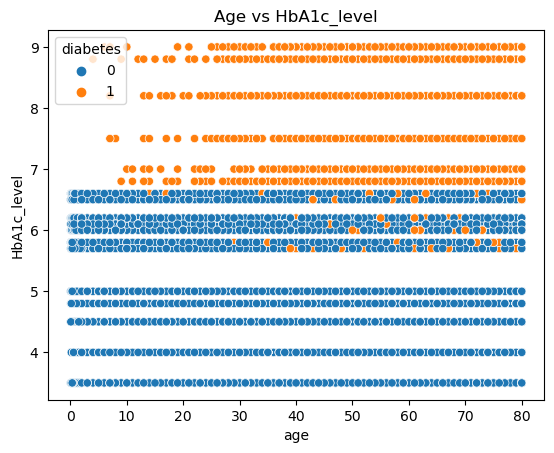

In [75]:
sns.scatterplot(x='age', y='HbA1c_level', hue='diabetes', data=data1)
plt.title('Age vs HbA1c_level')
plt.show()

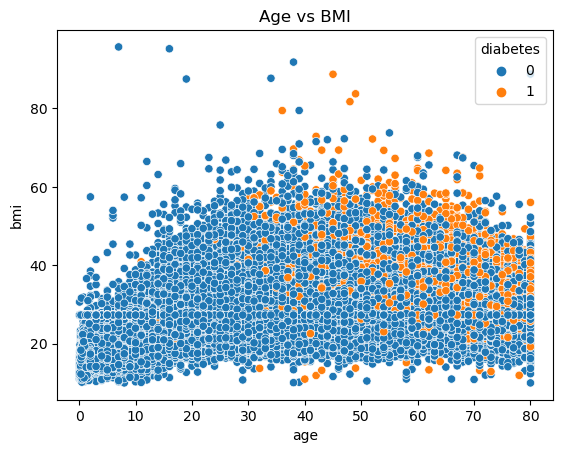

In [76]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=data1)
plt.title('Age vs BMI')
plt.show()

In [77]:
training_points = data1.drop(columns=['diabetes'])
training_labels = data1['diabetes']
X_train, X_test, y_train, y_test = train_test_split(
training_points,
training_labels,
test_size=0.1, #test_size=0.2 #Test dataset is 20% and training dataset is 80%
random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape) 

(86515, 8)
(86515,)
(9613, 8)
(9613,)


In [78]:
print(data1.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [79]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)
print(guesses)

[0 0 1 ... 0 1 0]


In [80]:
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[8675   76]
 [ 384  478]]
0.9521481327369188


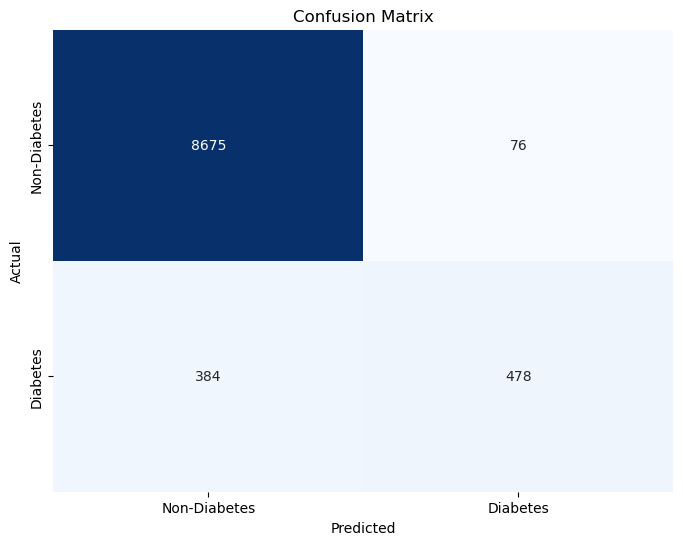

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, guesses)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Diabetes', 'Diabetes'],
            yticklabels=['Non-Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

[0.9378965983563924, 0.9506917715593467, 0.9479871008009987, 0.9517320295433267, 0.9521481327369188, 0.9522521585353168, 0.9528763133257048, 0.9528763133257048, 0.9532924165192967, 0.9522521585353168, 0.9526682617289087, 0.9511078747529387, 0.9514199521481327, 0.9511078747529387, 0.9523561843337147, 0.9504837199625508, 0.9515239779465308, 0.9501716425673568, 0.9506917715593467, 0.9501716425673568, 0.9501716425673568, 0.9498595651721627, 0.9500676167689587, 0.9497555393737647, 0.9497555393737647, 0.9489233329865807, 0.9496515135753667, 0.9491313845833766, 0.9493394361801727, 0.9489233329865807, 0.9489233329865807, 0.9490273587849787, 0.9486112555913867, 0.9486112555913867, 0.9488193071881826, 0.9485072297929886, 0.9486112555913867, 0.9480911265993966, 0.9482991781961927, 0.9477790492042026, 0.9478830750026006, 0.9472589202122126, 0.9475709976074066, 0.9470508686154167, 0.9471548944138146, 0.9470508686154167, 0.9473629460106107, 0.9473629460106107, 0.9475709976074066]


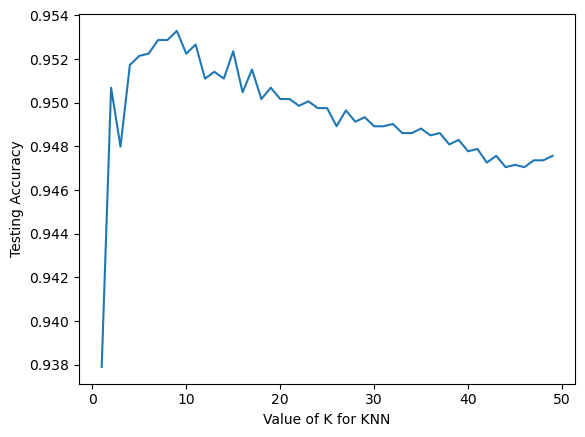

In [82]:
k_range = range(1, 50)
accuracy_scores = []
for k in k_range:
 classifier = KNeighborsClassifier(n_neighbors = k)
 classifier.fit(X_train, y_train)
 guesses = classifier.predict(X_test)
 accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)
#Visualize the result of KNN accuracy with matplotlib
plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()